In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns



# Cálculo de autovectores: Método de la potencia

## Ejercicio 1: Metodo de la potencia

Implementar el método de la potencia considerando algún criterio de parada (además del corte por cantidad de iteraciones)

In [66]:
import numpy as np

def power_iteration(A, niter=10_000, eps=1e-6):
    """
    Calcula el autovector al autovalor asociado de valor máximo

    Devuelve (a, v) con a autovalor, y v autovector de A

    Arguments:
    ----------

    A: np.array
        Matriz de la cual quiero calcular el autovector y autovalor

    niter: int (> 0)
        Cantidad de iteraciones

    eps: Epsilon
        Tolerancia utilizada en el criterio de parada
    """
    v = np.random.rand(A.shape[0]) #A es cuadrada, [0] = [1]
    for i in range(niter):
        v = (A @ v) / np.linalg.norm(A @ v)
        if (np.allclose(A @ v, ((v.T @ (A @ v)) / (v.T @ v))*v, rtol = eps)):
            break

    
    a = (v.T @ (A @ v)) / (v.T @ v)
    """
    TODO: Completar el método de la potencia

    IMPORTANTE: Agreguen algún criterio de parada!
    """

    return a, v

Verifiquemos la implementación con ejemplos con autovalores y autovectores conocidos.

a) Matriz D diagonal con autovalores y autovectores conocidos

$$
D = \begin{pmatrix}
d_1    &0     &0      &0      &\\
0      &d_2   &0      &0      &\\
\vdots &\vdots&\ddots &\vdots &\\
0      &0     &0      &d_n    & \\
\end{pmatrix}
$$


b) Matriz A semejante a una matriz diagonal D con autovalores conocidos.

$$
A = Q \begin{pmatrix}
d_1    &0     &0      &0      &\\
0      &d_2   &0      &0      &\\
\vdots &\vdots&\ddots &\vdots &\\
0      &0     &0      &d_n    & \\
\end{pmatrix} Q^T
$$

con $Q = I - 2 v v^T$, $||v||_2=1$ la matriz de reflexión de Householder que sabemos que es ortogonal


In [199]:
D = np.diag([5.0, 4.0, 3.0, 2.0, 1])
#l, v = power_iteration(D)
#print(l,v)

# Vector v aleatorio y de norma 1
v = np.random.rand(D.shape[0])
v = v/np.linalg.norm(v)

# Matriz de Householder
B = np.eye(D.shape[0]) - 2 * np.outer(v, v)

# Matriz a diagonalizar, recordar B es simétrica y ortogonal
M = B @ (D @ B.T)

l, v = power_iteration(M,niter=10000, eps=1e-16)
print(l,v)

5.0 [-0.48900187  0.52983832  0.28455021  0.42832768  0.4644514 ]


In [209]:
# Verificar l es autovalor dominante
assert(l == 5)

eps=1e-6 #Pongo un error, pues pueden diferir en una cantidad minima los valores

# Verificar v es autovector
print(M @ v)
print(l * v)
assert(np.allclose(M @ v, l * v, atol = eps))

[-2.44500936  2.64919161  1.42275105  2.1416384   2.32225698]
[-2.44500935  2.6491916   1.42275106  2.14163841  2.32225699]


Otra forma de chequear:

Si llamamos  $\hat v_1$ al autovector dominante estimado y $\hat \lambda_1$ al autovalor asociado estimado, entonces chequeemos que cumple con ser un autovector por definición:

$$ A \hat v_1 \approx \hat \lambda_1 v_1$$

y por lo tanto

$$ || A \hat v_1 - \hat \lambda_1 v_1 || < \epsilon $$

para  $\epsilon$  suficientemente chico (que dependera de la aplicación y el contexto).
Para este caso, probar con $10^{-6}$



In [213]:
# Completar
assert(np.linalg.norm(M@v - l*v) < 1e-6)

## Ejercicio 2: Velocidad de convergencia

Mostrar la convergencia de la sucesión de autovalores $\{\lambda_{k}\}_{k \in \mathbb{N}}$ al autovalor dominante.

Utilizar la matriz M como se definió en el ejercicio anterior con autovalores $[5,4,3,2,1]$

<>:8: SyntaxWarning: invalid escape sequence '\l'
<>:8: SyntaxWarning: invalid escape sequence '\l'
C:\Users\franp\AppData\Local\Temp\ipykernel_12280\1163481648.py:8: SyntaxWarning: invalid escape sequence '\l'
  plt.ylabel("$\lambda_k$")


Text(0, 0.5, '$\\lambda_k$')

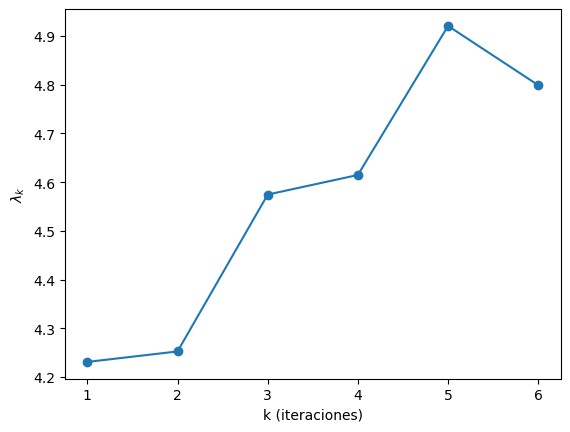

In [229]:
k = 6
res = {'k': list(range(1,k+1)), 'autovalor': []}
for i in range (k):
    res['autovalor'].append(power_iteration(M, i+1)[0])
    
plt.plot(res['k'], res['autovalor'], marker='o', linestyle='-')
plt.xlabel(r"k (iteraciones)")
plt.ylabel("$\lambda_k$")

Repetir el análisis anterior pero para una matriz M con autovalores $[5, 4.9, 3,2,1]$. ¿De qué parece depender la velocidad de convergencia?

<>:26: SyntaxWarning: invalid escape sequence '\l'
<>:26: SyntaxWarning: invalid escape sequence '\l'
C:\Users\franp\AppData\Local\Temp\ipykernel_12280\1514726114.py:26: SyntaxWarning: invalid escape sequence '\l'
  plt.ylabel("$\lambda_k$")


Text(0, 0.5, '$\\lambda_k$')

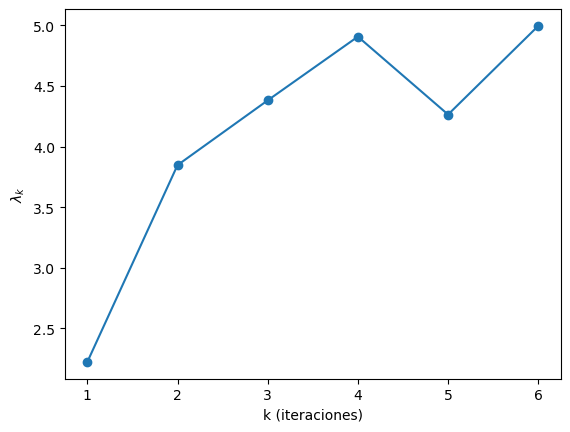

In [231]:
# COMPLETAR
D_prima = np.diag([5.0, 4.9, 3.0, 2.0, 1])
#l, v = power_iteration(D)
#print(l,v)

# Vector v aleatorio y de norma 1
v = np.random.rand(D.shape[0])
v = v/np.linalg.norm(v)

# Matriz de Householder
B = np.eye(D.shape[0]) - 2 * np.outer(v, v)

# Matriz a diagonalizar, recordar B es simétrica y ortogonal
M_prima = B @ (D @ B.T)
l, v = power_iteration(M,niter=10000, eps=1e-16)

#-------------------------
k = 6
res = {'k': list(range(1,k+1)), 'autovalor': []}
for i in range (k):
    res['autovalor'].append(power_iteration(M_prima, i+1)[0])
    
plt.plot(res['k'], res['autovalor'], marker='o', linestyle='-')
plt.xlabel(r"k (iteraciones)")
plt.ylabel("$\lambda_k$")



#La velocidad de convergencia depende de la cercania entre los autovalores. Mientras más similares, mayor tiempo/mayor cantidad de iteraciones se requerirán

---


Definición: Sea ${\alpha_n}$ una sucesión que converge a $\alpha$. Sea ${\beta_n}$ convergente a 0.

Decimos que ${\alpha_n}$ tiene orden de convergencia $O(\beta_n)$ (es decir, que $\alpha_n$ converge tan rápido como $\beta_{n}$) si existe c > 0 tal que:

$$|\alpha_n − \alpha| ≤ c\beta_n$$ para todo
n suficientemente grande.



Analizar la velocidad de convergencia para la sucesión {$\lambda_k\}_{k}$ del autovalor dominante $\lambda_1 = 5$.

Verificar que, en caso de tomar cociente de Rayleigh, se obtiene convergencia cuadrática:

$$ \{\lambda_k\}_{k} \in O((\frac{\lambda_2}{\lambda_1})^{2k})$$



In [ ]:
# COMPLETAR

 ## Ejercicio 3: Metodo de la potencia inverso

Obtener el autovalor más chico de M (junto a su autovector) utilizando el método de la potencia inverso.

In [261]:
# COMPLETAR
D_inversa = np.diag([1/(5.0), 1/(4.0), 1/(3.0), 1/(2.0), 1])
M_inversa = B @ (D_inversa @ B.T)

l, v = power_iteration(M_inversa,niter=10000, eps=1e-16)
print(l,v)

1.0 [-0.12490106 -0.03030991 -0.12408743 -0.2566508   0.94984931]


## Ejercicio 4: Metodo de la potencia + Deflación

Implementar método de la potencia + deflación

In [311]:
def eigen(A, num=2, niter=10000, eps=1e-6):
    """
    Calculamos num autovalores y autovectores usando método de la potencia+deflación
    """
    A_prima = A.copy()
    eigenvalues = []
    eigenvectors = np.zeros((A.shape[0], num))
    for i in range(num):
        l,v = power_iteration(A_prima, niter, eps)
        v = v / np.linalg.norm(v)
        eigenvectors[:,i] = v
        eigenvalues.append(l)
        A_prima = A_prima - l * np.outer(v, v)
        pass
    return np.array(eigenvalues), eigenvectors

print(eigen(M))

(array([5., 4.]), array([[-0.73006336,  0.42791479],
       [ 0.42791089, -0.32165889],
       [ 0.35908676,  0.56923312],
       [ 0.25110214,  0.39805449],
       [ 0.30315699,  0.48057337]]))


Calcular todos los autovalores y autovectores de la matriz M definida inicialmente.

Verificar que los errores de las aproximaciones obtenidas

$$ || A \hat v_i - \hat \lambda_i v_i || < \epsilon $$

se encuentren dentro de una tolerancia de $10^{-6}$.

Verificar que con los autovectores obtenidos, se obtiene una diagonalización de la matriz A.

In [351]:
D = np.diag([5.0, 4.0, 3.0, 2.0, 1.0])

# Vector v aleatorio y de norma 1
v = np.random.rand(D.shape[0])
v = v/np.linalg.norm(v)

# Matriz de Householder
B = np.eye(D.shape[0]) - 2 * np.outer(v, v)

# Matriz a diagonalizar, recordar B es simétrica y ortogonal

M = B @ (D @ B.T)

l, V = eigen(M, 5)

for i in range (5):
    print(np.linalg.norm(M@V[:,i] - l[i]*V[:,i]))
    assert(np.linalg.norm(M@V[:,i] - l[i]*V[:,i]) < 1e-06)
# Verificar error dentro de tolerancia
#assert(np.linalg.norm(M@V - l*V) < 1e-6)

# Verificar que diagonalizacion de A
assert np.allclose(np.sort(np.diag(D)), np.sort(l), atol=1e-6)


1.4730302166159309e-07
3.257129180025239e-07
6.543775240920172e-07
8.618461359477637e-07
5.217219162331036e-07


## Ejercicio 5: Más Casos de prueba para divertirse un rato

Corroborar que para la siguiente matriz se cumplen todas las hipótesis del método de la potencia + deflación.

Verificar con la noción de error del ejercicio anterior, que pueden encontrarse todos sus autovectores y autovalores.

In [ ]:
A = np.array([
  [ 7,  2,  -3],
  [ 2,  2,  -2],
  [-3, -2,  -2]
])


Para una matriz A cualquiera (considerar por ejemplo la anterior), estudiar la relación entre los autovectores y autovalores de $AA^T$ y $A^TA$.

Obtenerlos mediante el método de la potencia + deflación y verificar que se cumpla dicha relación.

In [ ]:
TA = A.T @ A
AT = A @ A.T
wta, VTA, _ = eigen(AT, num=3, niter=20000, eps=1e-24)
wat, VAT, _ = eigen(TA, num=3, niter=20000, eps=1e-24)


# Verificar relacion entre autovalores y autovectores
assert(...)
assert(...)

Analizar lo que ocurre en este caso

In [ ]:
A = np.array([
  [7, 2, 3],
  [0, 2, 0],
  [-6, -2, -2]
])

w, V, _  = eigen(A, num=3, niter=20_000, eps=1e-14)
print("w")
print(w)
print("V")
print(V)

print("-"*20)
for i in range(len(A)):
    print(i)
    print(np.allclose(A @ V[:, i], w[i] * V[:,i]))

print("-"*20)

print("Usando numpy")
w2, V2 = LA.eigh(A)
print(w2)


for i in range(len(A)):
    print(i)
    print(np.allclose(A @ V2[:, i], w2[i] * V2[:,i]))



<div>
<img src="https://cdn131.picsart.com/331981814059211.png?to=crop&type=webp&r=1008x1096&q=85"  width="200">
</div>


## Otros casos más divertidos

¿Qué pasa si tenemos r autovalores iguales?

In [ ]:
D = np.diag(np.arange(10))
D[1,1] = 10
D[2,2] = 10
print(D)

# Matriz de Householder
B = ...

# Matriz a diagonalizar
M = ...

# Chequear utilizando la noción de error del ejercicio 4 para todo autovector y autovalor



Opcionales:

Asumiendo que el autovalor dominante tiene multiplicidad r, probar que el método converge a una combinación lineal del autoespacio dominante.

---
